In [159]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

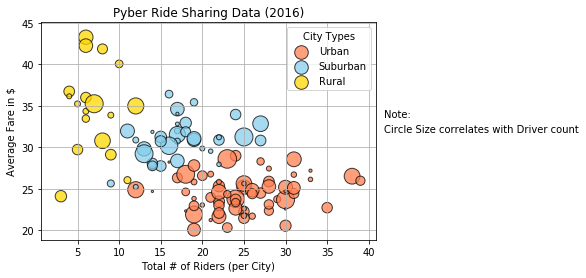

In [180]:
#groupby city
city_group = merge_table.groupby('city').agg(
    {
     'type': "max",
    'fare': "mean",
    'date' : "count",
    'driver_count' : "max"
    }
)

city_group_urban = city_group.loc[city_group['type']=="Urban",:]
city_group_suburban = city_group.loc[city_group['type']=="Suburban",:]
city_group_rural = city_group.loc[city_group['type']=="Rural",:]

# Obtain the x and y coordinates for each of the three city types
x_axis_urban = city_group_urban['date']
y_axis_urban = city_group_urban['fare']
# data_urban = (x_axis_urban,y_axis_urban)

x_axis_suburban = city_group_suburban['date']
y_axis_suburban = city_group_suburban['fare']
# data_suburban = (x_axis_suburban,y_axis_suburban)

x_axis_rural = city_group_rural['date']
y_axis_rural = city_group_rural['fare']
# data_rural = (x_axis_rural,y_axis_rural)

size = city_group['driver_count']*5
# data = (data_urban,data_suburban, data_rural)
# colors = ("Coral", "SkyBlue", "Gold")
groups = ("Urban","Suburban","Rural")

# Build the scatter plots for each city types
plt.figure(figsize=(6, 4))
plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="Coral", edgecolors="black", s=size, alpha=0.75, label="Urban")
plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="SkyBlue", edgecolors="black", s=size, alpha=0.75, label="Suburban")
plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="Gold", edgecolors="black", s=size, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare in $")
plt.xlabel("Total # of Riders (per City)")
plt.grid(True)

# Create a legend
plt.legend(groups, title="City Types", loc=1, fontsize='medium')

# Incorporate a text label regarding circle size
plt.figtext(0.92,0.55, s="Note:")
plt.figtext(0.92,0.50, s="Circle Size correlates with Driver count")
# Save Figure
plt.savefig('pyber_scatter.png')
plt.show()

# Total Fares by City Type

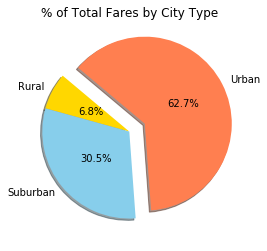

In [161]:
# Calculate Type Percents- groupby city type
type_group = merge_table.groupby('type').agg(
    {
    'fare': "sum",
    'date' : "count",
    'driver_count' : "sum"
    }
)

# Build Pie Chart

data = type_group['fare']
groups =  type_group.index
colors = ("Gold","SkyBlue", "Coral")
explode = (0, 0, 0.2)

plt.pie(data, explode=explode, labels=groups, colors=colors, radius=1,
        autopct="%1.1f%%", shadow=True, pctdistance=0.5, startangle=140)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('pyber_scatter.png')
plt.show()

# Total Rides by City Type

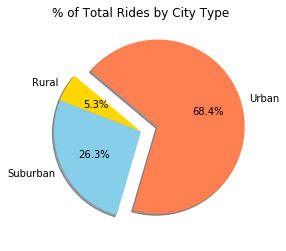

In [162]:
# Build Pie Chart

data2 = type_group['date']

plt.pie(data2, explode=explode, labels=groups, colors=colors, radius=1,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('pyber_pie2.png')
plt.show()

# Total Drivers by City Type

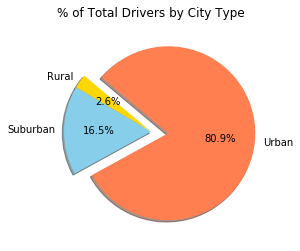

In [163]:
data3 = city_data.groupby(['type']).sum()
data3 = data3['driver_count']

plt.pie(data3, explode=explode, labels=groups, colors=colors, radius=1,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('pyber_pie3.png')
plt.show()

# Notes on trends

1) The majority of the rides, total fare and Drivers are in Urban Cities, but the amount of driver per city type overindexes to Urban (81%), although only 62% of rides happen in Urban cities.


2) Fares are more expensive in Rural areas than in Surburban and Urban citites. Rural areas tend to have fewer drivers, fewer rides but higher Cost/Ride (fare).

3) If I were to become a driver for Pyber, I would choose to drive in a Suburban area, since there seems to be more opportunity for drivers there. This conclusion was made by seeing that 26% of rides are happen in Suburban area and from a fare perspective, Suburban represents 30.5% of total but suburban drivers only represent 16.5% of total.

In [173]:
city_group = city_group.reset_index()
city_group = city_group.loc[city_group['city']=="Lake Jonathanshire",:]
# city_group.loc[city_group['type']=="Urban",:]
city_group

,city,type,fare,date,driver_count
34,Lake Jonathanshire,Urban,23.425833,24,5
